# Task 1 - Take a Peak (demo with chatGPT)

In [1]:
!pip install pandas

# Load the Dataset

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/DataAnalyst - DataAnalyst.csv')  # Replace 'your_dataset.csv' with the file path

# Shape of the dataset

In [4]:
# Get the number of rows and columns
rows, columns = df.shape

# Print the result
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2253
Number of columns: 16


# Peak of Dataset

In [5]:
# Display the first 5 rows of the dataset
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE


# Task 3: Deep Dive (Hands-on)

# Create a bar plot of job counts for from top 5 industries

['Social Assistance' 'Health Care Services & Hospitals' 'Internet'
 'IT Services' 'Sports & Recreation'
 'Investment Banking & Asset Management' 'Insurance Carriers'
 'Venture Capital & Private Equity' 'Research & Development' '-1'
 'Advertising & Marketing' 'Brokerage Services'
 'Building & Personnel Services' 'Consulting' 'Casual Restaurants'
 'Enterprise Software & Network Solutions' 'Lending'
 'Banks & Credit Unions' 'Computer Hardware & Software'
 'Staffing & Outsourcing' 'Motion Picture Production & Distribution'
 'Legal' 'Real Estate' 'Federal Agencies' 'TV Broadcast & Cable Networks'
 'Accounting' 'Food & Beverage Stores' 'Health, Beauty, & Fitness'
 'Biotech & Pharmaceuticals' 'Insurance Agencies & Brokerages' 'Gambling'
 'Video Games' 'Colleges & Universities'
 'Architectural & Engineering Services' 'General Repair & Maintenance'
 'Security Services' 'News Outlet'
 'Commercial Equipment Repair & Maintenance' 'Publishing' 'Energy'
 'Other Retail Stores' 'Health Fundraising Org

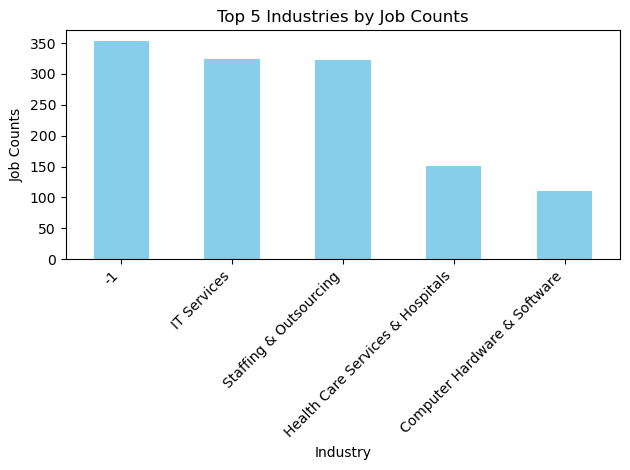

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/DataAnalyst - DataAnalyst.csv')

# Step 2: Group by 'Industry' and count job roles
# Assuming there's a column 'Industry' and a column 'Job Title' or similar to count jobs
industry_counts = df['Industry'].value_counts()

# Step 3: Select the top 5 industries with the most jobs
top_5_industries = industry_counts.nlargest(5)

# Step 4: Create a bar plot
top_5_industries.plot(kind='bar', color='skyblue')

# Step 5: Customize the plot
plt.title('Top 5 Industries by Job Counts')
plt.xlabel('Industry')
plt.ylabel('Job Counts')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Create a bar plot of mean salary estimate from the same top 5 industries


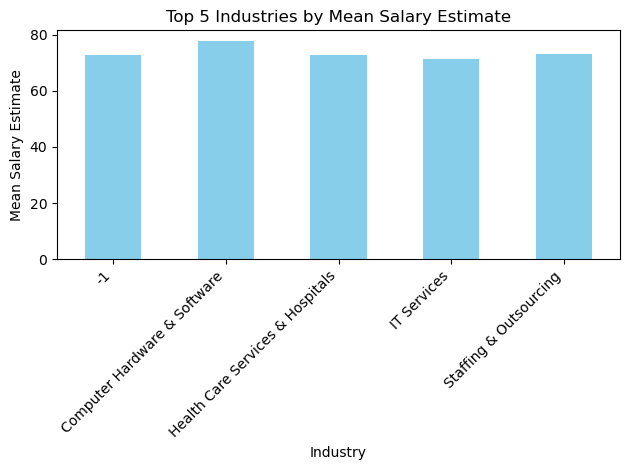

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/DataAnalyst - DataAnalyst.csv')


# Function to clean and extract the mid salary
def extract_mid_salary(salary_str):
    if pd.isna(salary_str):
        return None
    # Remove non-numeric characters except '-' (for ranges)
    salary_str = re.sub(r'[^\d\-]', '', str(salary_str))
    if '-' in salary_str:
        try:
            min_salary, max_salary = map(float, salary_str.split('-'))
            return (min_salary + max_salary) / 2
        except ValueError:
            return None
    else:
        try:
            return float(salary_str)
        except ValueError:
            return None

# Clean the "Salary Estimate" column
df['Salary Estimate'] = df['Salary Estimate'].apply(extract_mid_salary)

# Drop rows where Salary Estimate could not be converted to a float
df = df.dropna(subset=['Salary Estimate'])

# Step 1: Find top 5 industries by job counts
industry_counts = df['Industry'].value_counts()
top_5_industries_list = industry_counts.nlargest(5).index

# Step 2: Filter dataset to include only top 5 industries
df_top_5 = df[df['Industry'].isin(top_5_industries_list)]

# Step 3: Calculate the mean salary for the top 5 industries
industry_salary_mean = df_top_5.groupby('Industry')['Salary Estimate'].mean()

# Step 4: Create a bar plot for the mean salary of the top 5 industries
industry_salary_mean.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Top 5 Industries by Mean Salary Estimate')
plt.xlabel('Industry')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Come up with a curious question of your own about this dataset and solve it writing code

# Which industries have the highest variance in salary estimates?

Industry
Transportation Equipment Manufacturing    3289.750000
Sports & Recreation                       2900.583333
Financial Analytics & Research            1984.500000
Department, Clothing, & Shoe Stores       1510.925000
Electrical & Electronic Manufacturing     1408.466667
Membership Organizations                  1352.562500
Wholesale                                 1086.741667
Financial Transaction Processing          1066.711111
Real Estate                                961.537879
Utilities                                  903.125000
Name: Salary Estimate, dtype: float64


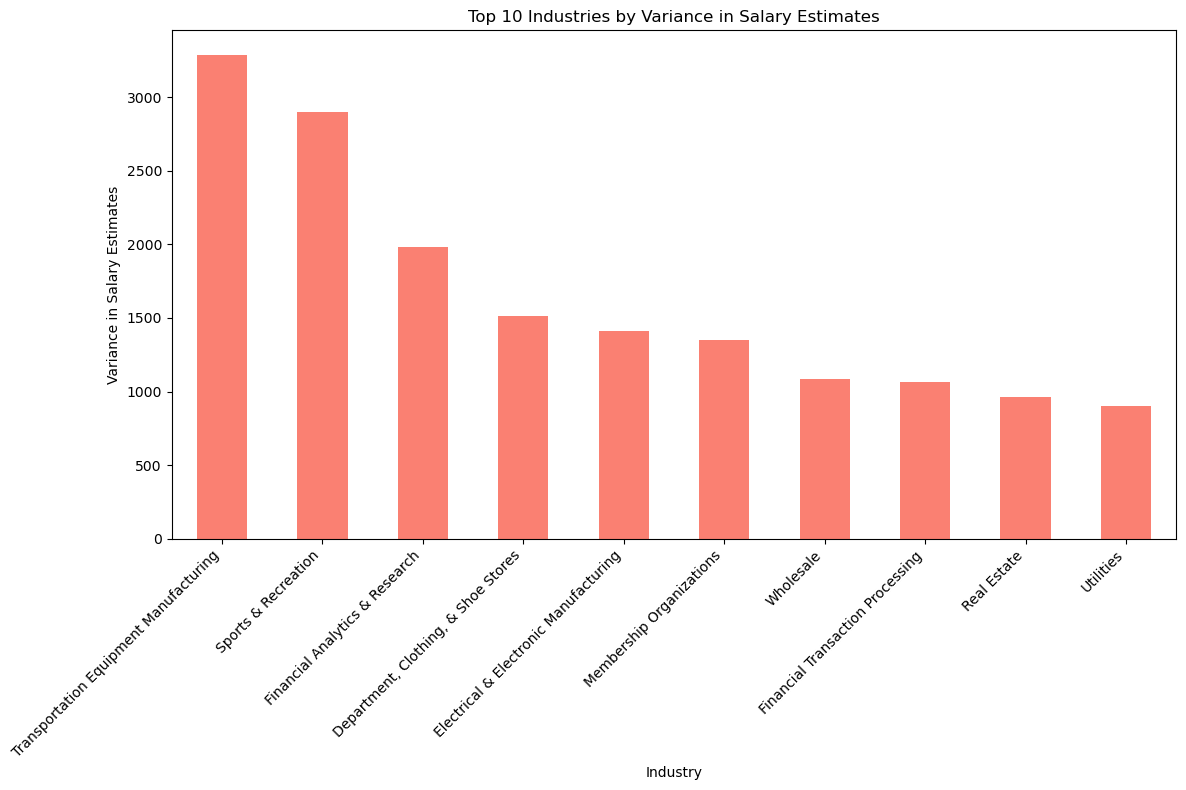

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/DataAnalyst - DataAnalyst.csv')


# Function to clean and extract the mid salary
def extract_mid_salary(salary_str):
    if pd.isna(salary_str):
        return None
    salary_str = re.sub(r'[^\d\-]', '', str(salary_str))
    if '-' in salary_str:
        try:
            min_salary, max_salary = map(float, salary_str.split('-'))
            return (min_salary + max_salary) / 2
        except ValueError:
            return None
    else:
        try:
            return float(salary_str)
        except ValueError:
            return None

# Clean the "Salary Estimate" column
df['Salary Estimate'] = df['Salary Estimate'].apply(extract_mid_salary)

# Drop rows where Salary Estimate could not be converted to a float
df = df.dropna(subset=['Salary Estimate'])

# Calculate the variance of salary estimates for each industry
industry_salary_variance = df.groupby('Industry')['Salary Estimate'].var()

# Select the top 10 industries by variance
top_10_industries_variance = industry_salary_variance.nlargest(10)

# Print the top 10 industries with the highest variance
print(top_10_industries_variance)

# Create a bar plot for the top 10 industries with highest variance
plt.figure(figsize=(12, 8))
top_10_industries_variance.plot(kind='bar', color='salmon')

# Customize the plot
plt.title('Top 10 Industries by Variance in Salary Estimates')
plt.xlabel('Industry')
plt.ylabel('Variance in Salary Estimates')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()